In [1]:
# Head model and forward computation
# https://mne.tools/stable/auto_tutorials/forward/30_forward.html


In [18]:
import mne
from mne.datasets import sample
data_path = sample.data_path()

# the raw file containing the channel location + types
sample_dir = data_path / 'MEG' / 'sample'
raw_fname = sample_dir / 'sample_audvis_raw.fif'
# The paths to Freesurfer reconstructions
subjects_dir = data_path / 'subjects'
subject = 'fsaverage' # change it to use freesurfer's bem

Using surface: /home/zhibinz2/mne_data/MNE-sample-data/subjects/fsaverage/bem/inner_skull.surf
Using surface: /home/zhibinz2/mne_data/MNE-sample-data/subjects/fsaverage/bem/outer_skull.surf
Using surface: /home/zhibinz2/mne_data/MNE-sample-data/subjects/fsaverage/bem/outer_skin.surf


/home/zhibinz2/mne-python/1.3.0_0/envs/mne/lib/python3.10/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


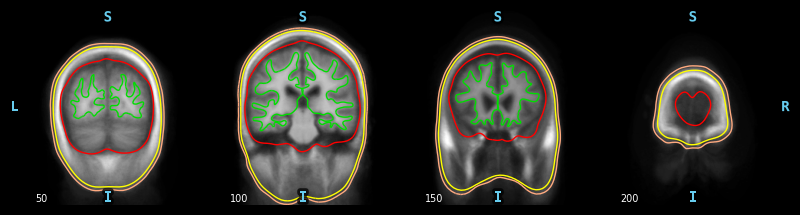

In [19]:
# Compute and visualize BEM surfaces
plot_bem_kwargs = dict(
    subject=subject, subjects_dir=subjects_dir,
    brain_surfaces='white', orientation='coronal',
    slices=[50, 100, 150, 200])

# change 'white' to 'pial' to get pial surface

mne.viz.plot_bem(**plot_bem_kwargs)

In [24]:
# visualizing the coregistration
# The transformation file obtained by coregistration
# trans = sample_dir / 'sample_audvis_raw-trans.fif'
trans = 'fsaverage' 

info = mne.io.read_info(raw_fname)
# Here we look at the dense head, which isn't used for BEM computations but
# is useful for coregistration.
mne.viz.plot_alignment(info, trans, subject=subject, dig=True,
                       meg=['helmet', 'sensors'], subjects_dir=subjects_dir,
                       surfaces='head-dense')


    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle


Using fsaverage-head-dense.fif for head surface.
    1 BEM surfaces found
    Reading a surface...
[done]
    1 BEM surfaces read
Getting helmet for system 306m
Channel types::	grad: 203, mag: 102, eeg: 59


In [25]:
# Compute Source Space
# src = mne.setup_source_space(subject, spacing='oct4', add_dist='patch',
#                              subjects_dir=subjects_dir)

# Download fsaverage files
import os.path as op
from mne.datasets import fetch_fsaverage
fs_dir = fetch_fsaverage(verbose=True)
subjects_dir = op.dirname(fs_dir)
src = op.join(fs_dir, "bem", "fsaverage-ico-5-src.fif")

print(src)


0 files missing from root.txt in /home/zhibinz2/mne_data/MNE-sample-data/subjects
0 files missing from bem.txt in /home/zhibinz2/mne_data/MNE-sample-data/subjects/fsaverage
/home/zhibinz2/mne_data/MNE-sample-data/subjects/fsaverage/bem/fsaverage-ico-5-src.fif


Using surface: C:\Users\zhouz\mne_data\MNE-sample-data\subjects\fsaverage\bem\inner_skull.surf
Using surface: C:\Users\zhouz\mne_data\MNE-sample-data\subjects\fsaverage\bem\outer_skull.surf
Using surface: C:\Users\zhouz\mne_data\MNE-sample-data\subjects\fsaverage\bem\outer_skin.surf
    Reading a source space...
    [done]
    Reading a source space...
    [done]
    2 source spaces read


c:\Users\zhouz\mne-python\1.3.1_0\envs\mne\lib\site-packages\mne\viz\utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


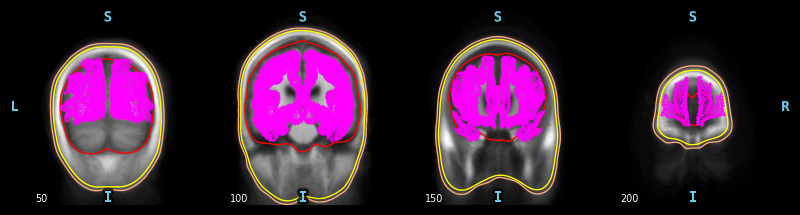

In [23]:
mne.viz.plot_bem(src=src, **plot_bem_kwargs)

Sphere                : origin at (0.0 0.0 40.0) mm
              radius  : 90.0 mm
grid                  : 5.0 mm
mindist               : 5.0 mm
MRI volume            : /home/zhibinz2/mne_data/MNE-sample-data/subjects/fsaverage/mri/T1.mgz

Reading /home/zhibinz2/mne_data/MNE-sample-data/subjects/fsaverage/mri/T1.mgz...

Setting up the sphere...
Surface CM = (   0.0    0.0   40.0) mm
Surface fits inside a sphere with radius   90.0 mm
Surface extent:
    x =  -90.0 ...   90.0 mm
    y =  -90.0 ...   90.0 mm
    z =  -50.0 ...  130.0 mm
Grid extent:
    x =  -95.0 ...   95.0 mm
    y =  -95.0 ...   95.0 mm
    z =  -50.0 ...  135.0 mm
57798 sources before omitting any.
24365 sources after omitting infeasible sources not within 0.0 - 90.0 mm.
20377 sources remaining after excluding the sources outside the surface and less than    5.0 mm inside.
Adjusting the neighborhood info.
Source space : MRI voxel -> MRI (surface RAS)
     0.005000  0.000000  0.000000     -95.00 mm
     0.000000  0.00

/home/zhibinz2/mne-python/1.3.0_0/envs/mne/lib/python3.10/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


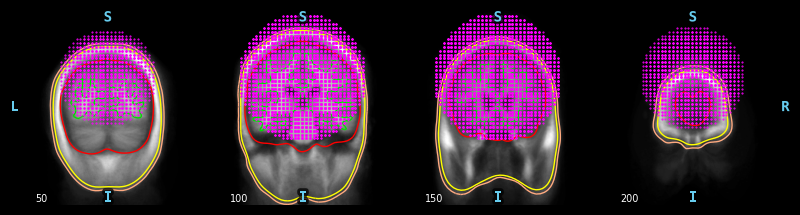

In [26]:
sphere = (0.0, 0.0, 0.04, 0.09)
vol_src = mne.setup_volume_source_space(
    subject, subjects_dir=subjects_dir, sphere=sphere, sphere_units='m',
    add_interpolator=False)  # just for speed!
print(vol_src)

mne.viz.plot_bem(src=vol_src, **plot_bem_kwargs)

In [29]:
surface = subjects_dir / subject / 'bem' / 'inner_skull.surf'
vol_src = mne.setup_volume_source_space(
    subject, subjects_dir=subjects_dir, surface=surface,
    add_interpolator=False)  # Just for speed!
print(vol_src)

mne.viz.plot_bem(src=vol_src, **plot_bem_kwargs)

TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [30]:
fig = mne.viz.plot_alignment(subject=subject, subjects_dir=subjects_dir,
                             surfaces='white', coord_frame='mri',
                             src=src)
mne.viz.set_3d_view(fig, azimuth=173.78, elevation=101.75,
                    distance=0.30, focalpoint=(-0.03, -0.01, 0.03))

Reading /home/zhibinz2/mne_data/MNE-sample-data/subjects/fsaverage/bem/fsaverage-ico-5-src.fif...


In [15]:
# compute forward solution
conductivity = (0.3,)  # for single layer
# conductivity = (0.3, 0.006, 0.3)  # for three layers
model = mne.make_bem_model(subject='fsaverage', ico=4,
                           conductivity=conductivity,
                           subjects_dir=subjects_dir)
bem = mne.make_bem_solution(model)


Creating the BEM geometry...
Going from 5th to 4th subdivision of an icosahedron (n_tri: 20480 -> 5120)
inner skull CM is  -0.53 -21.10   6.21 mm
Surfaces passed the basic topology checks.
Complete.

Homogeneous model surface loaded.
Computing the linear collocation solution...
    Matrix coefficients...
        inner skull (2562) -> inner skull (2562) ...
    Inverting the coefficient matrix...
Solution ready.
BEM geometry computations complete.


In [16]:
fwd = mne.make_forward_solution(raw_fname, trans=trans, src=src, bem=bem,
                                meg=True, eeg=False, mindist=5.0, n_jobs=None,
                                verbose=True)
print(fwd)

Source space          : <SourceSpaces: [<surface (lh), n_vertices=163842, n_used=258>, <surface (rh), n_vertices=163842, n_used=258>] MRI (surface RAS) coords, subject 'fsaverage', ~28.8 MB>
MRI -> head transform : c:\Users\zhouz\mne-python\1.3.1_0\envs\mne\lib\site-packages\mne\data\fsaverage\fsaverage-trans.fif
Measurement data      : sample_audvis_raw.fif
Conductor model   : instance of ConductorModel
Accurate field computations
Do computations in head coordinates
Free source orientations

Read 2 source spaces a total of 516 active source locations

Coordinate transformation: MRI (surface RAS) -> head
     0.999994  0.003552  0.000202      -1.76 mm
    -0.003558  0.998389  0.056626      31.09 mm
    -0.000001 -0.056626  0.998395      39.60 mm
     0.000000  0.000000  0.000000       1.00

Read 306 MEG channels from info
105 coil definitions read
Coordinate transformation: MEG device -> head
     0.991420 -0.039936 -0.124467      -6.13 mm
     0.060661  0.984012  0.167456       0.06 m

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


    Found   0/200 points outside using solid angles
    Total 258/258 points inside the surface
Interior check completed in 116.1 ms

Checking surface interior status for 306 points...
    Found   0/306 points inside  an interior sphere of radius   47.7 mm
    Found 306/306 points outside an exterior sphere of radius   98.3 mm
    Found   0/  0 points outside using surface Qhull
    Found   0/  0 points outside using solid angles
    Total 0/306 points inside the surface
Interior check completed in 31.4 ms

Composing the field computation matrix...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Computing MEG at 516 source locations (free orientations)...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Finished.
<Forward | MEG channels: 306 | EEG channels: 0 | Source space: Surface with 516 vertices | Source orientation: Free>


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [12]:
print(f'Before: {src}')
print(f'After:  {fwd["src"]}')

Before: <SourceSpaces: [<surface (lh), n_vertices=163842, n_used=258>, <surface (rh), n_vertices=163842, n_used=258>] MRI (surface RAS) coords, subject 'fsaverage', ~30.1 MB>
After:  <SourceSpaces: [<surface (lh), n_vertices=163842, n_used=258>, <surface (rh), n_vertices=163842, n_used=258>] head coords, subject 'fsaverage', ~30.1 MB>


In [13]:
leadfield = fwd['sol']['data']
print("Leadfield size : %d sensors x %d dipoles" % leadfield.shape)

Leadfield size : 306 sensors x 1548 dipoles


In [14]:
fwd_fixed = mne.convert_forward_solution(fwd, surf_ori=True, force_fixed=True,
                                         use_cps=True)
leadfield = fwd_fixed['sol']['data']
print("Leadfield size : %d sensors x %d dipoles" % leadfield.shape)

    Average patch normals will be employed in the rotation to the local surface coordinates....
    Converting to surface-based source orientations...
    [done]
Leadfield size : 306 sensors x 516 dipoles
